Hooke's Law
==========

We are going to "learn" Hooke's law from data.  I have provided you
with data from some experiments, where I attached a weight $x$ to a spring
and measured the elongation $y$ of the spring.

You should follow the machine learning procedure to train a linear model
$$
    \hat y = f(x; \theta) = \theta x
$$
and validate it against the data.  You should follow the step-by-step
procedure outlined in the lecture.

Step 1: Get data
---------------

You should find a text file `spring.dat` in your directory.  This file
has a set of rows, each row containing `x y` ($x$ and associated $y$
value).

Use numpy's `loadtxt` function to load that data as a matrix and then
assign the first column to `x` and the second column to `y`.

In [1]:
import numpy as np

In [7]:
data = np.loadtxt("spring.dat")
x = data[:,0]
y = data[:,1]



In [44]:
y

array([0.12862 , 0.054634, 0.14028 , 0.15544 , 0.      , 0.19805 ,
       0.44052 , 0.13084 , 0.13165 , 0.52732 , 0.39031 , 0.34448 ,
       0.33124 , 0.38155 , 0.26167 , 0.31755 , 0.055037, 0.080485,
       0.54617 , 0.2561  , 0.41512 , 0.56023 , 0.30853 , 0.25617 ,
       0.35459 , 0.78459 , 0.58324 , 0.95553 , 0.46362 , 0.48734 ,
       0.6097  , 0.71927 , 0.34595 , 0.53067 , 0.98785 , 0.64825 ,
       0.41311 , 0.56502 , 0.90453 , 1.0404  , 1.2542  , 0.59144 ,
       0.90114 , 0.65295 , 0.63789 , 0.97389 , 0.71744 , 0.39303 ,
       0.98342 , 1.2173  , 0.85123 , 1.1035  , 0.93499 , 0.84103 ,
       1.0703  , 1.0445  , 0.64394 , 1.4637  , 0.935   , 0.74874 ,
       1.4547  , 1.3035  , 0.96652 , 1.0436  , 1.0935  , 1.5568  ,
       1.1308  , 1.7173  , 0.88114 , 1.2531  , 1.2072  , 1.3531  ,
       1.245   , 1.0539  , 1.4229  , 1.2705  , 1.6224  , 1.4301  ,
       1.3143  , 1.1191  , 1.7901  , 1.4887  , 2.1124  , 1.1588  ,
       1.7143  , 1.5789  , 1.2734  , 1.9141  , 1.6351  , 1.660

In [4]:
assert (x, y) is not None
assert x.shape == y.shape == (100,)
np.testing.assert_allclose(x.sum(), 49.26, atol=1e-12, rtol=1e-12)
np.testing.assert_allclose(y.sum(), 92.868096, atol=1e-12, rtol=1e-12)

Let's plot the data to get a feel:

Make a plot of $y$ over $x$, but please **do not** connect
the points using lines (you can just use a marker like `+` etc.
as a plot style to not plot lines or alternatively use `pl.scatter`).

Remember: plots have x and y axis labels and a title!

Text(0.5, 1.0, 'A plot of spring force over elongation')

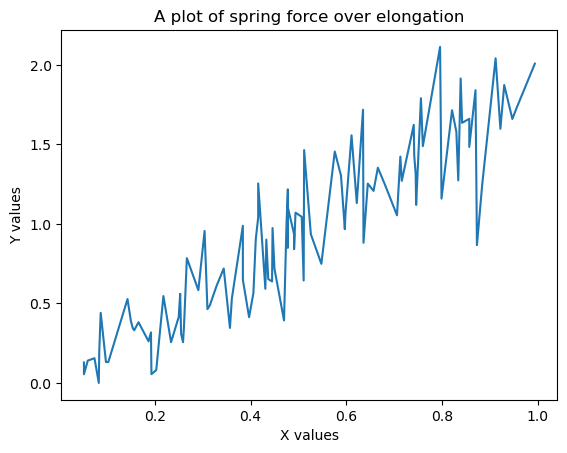

In [8]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('A plot of spring force over elongation')

Step 2: Split data into training and validation sets
--------------------------------------------------------------

Partition your data into two, about equally large, sets:

 - a training set with `xtrain` and corresponding `ytrain`
 - a validation set with `xtest` and corresponding `ytest`
 
To avoid biasing your results, it is important to do this
**randomly**.  For this we are going to use a random number
generator (see next line).

The simplest way of splitting up the data is then the following:

 * for each data point, generate a random number between 0 and 1.
 If that number is greater than 0.5, put the corresponding `x`
 and `y` into the validation set, otherwise put it in the training
 set.  Be careful not to separate pairs of `x` and `y`.

In [9]:
# Creates a new pseudo-random number generator
random = np.random.default_rng(4711)

In [15]:
# Get a random number uniformly distributed between 0 and 1
random.uniform()

0.8400356722860511

In [16]:
# Another random number
len(x)

100

In [54]:
# You should fill the variables xtest, ytest, xtrain, ytrain here
# YOUR CODE HERE
xtesttemp = []
ytesttemp = []
xtraintemp = []
ytraintemp = []

for xv, yv in zip(x, y):
    if random.uniform() > 0.5:
        xtesttemp.append(xv)
        ytesttemp.append(yv)
    else:
        xtraintemp.append(xv)
        ytraintemp.append(yv)
        
xtest = np.array(xtesttemp)
ytest = np.array(ytesttemp)
xtrain = np.array(xtraintemp)
ytrain = np.array(ytraintemp)

In [55]:
xtest

array([0.06 , 0.074, 0.083, 0.143, 0.157, 0.166, 0.192, 0.193, 0.203,
       0.218, 0.234, 0.261, 0.31 , 0.329, 0.344, 0.384, 0.406, 0.416,
       0.416, 0.431, 0.437, 0.445, 0.446, 0.475, 0.478, 0.507, 0.526,
       0.548, 0.589, 0.597, 0.598, 0.611, 0.645, 0.666, 0.681, 0.706,
       0.745, 0.746, 0.76 , 0.796, 0.821, 0.83 , 0.834, 0.842, 0.87 ,
       0.873, 0.912, 0.922, 0.947])

In [56]:
assert (xtest, ytest, xtrain, ytrain) is not None
assert xtest.size == ytest.size
assert xtrain.size == ytrain.size
assert xtest.size > 25 and xtest.size < 75

dfull = np.sort(np.rec.fromarrays([x,y], names="x,y"))
dsplit = np.sort(np.rec.fromarrays(
    [np.hstack([xtrain,xtest]), np.hstack([ytrain,ytest])],
    names="x,y"))
np.testing.assert_allclose(
    dfull["x"], dsplit["x"], err_msg='some x values are missing/incorrect')
np.testing.assert_allclose(
    dfull["y"], dsplit["y"], err_msg='some y values are missing/incorrect')
del dfull, dsplit

Let's again plot the training and validation set to make sure we haven't biased either set in any way.

You should modify the plot above to plot x and y values in the training set as a point cloud
and (in another color) the x and y values in the validation set.

Be sure to give each set of points a **label**, include a figure **title** and also show a **legend**.  You can
do so with `pl.plot(..., label='some label text')` and `pl.legend()`.

Text(0.5, 1.0, 'A plot of spring force over elongation in testdata')

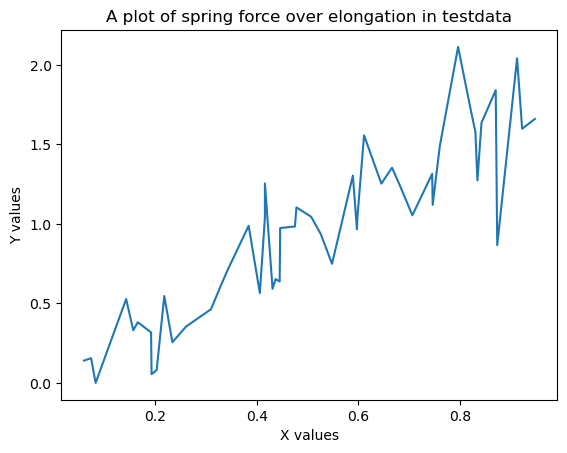

In [57]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
plt.plot(xtest, ytest)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('A plot of spring force over elongation in testdata')

Text(0.5, 1.0, 'A plot of spring force over elongation in trainingdata')

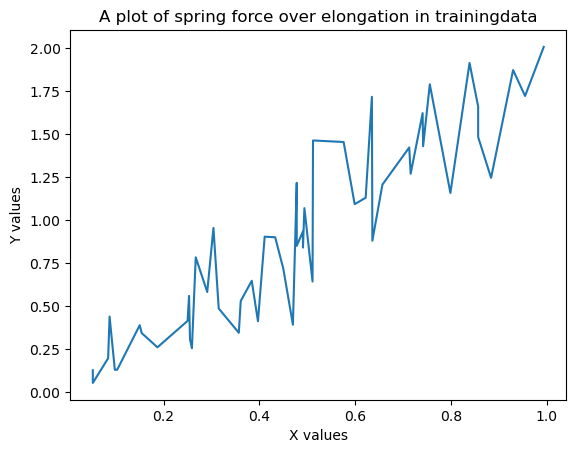

In [58]:
import matplotlib.pyplot as plt
plt.plot(xtrain, ytrain)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('A plot of spring force over elongation in trainingdata')

Step 3: Formulate and train linear model
--------------------------

Let us now formulate our model and train it on the data.
First let us define a model function `fmodel` that depends on
a feature vector `x` and some parameters `theta` and
predicts a label `y`.

(Hint: `a.T` gives the transpose of a numpy array `a`)

In [65]:
def fmodel(x, theta):
    return sum(x*theta)

In [66]:
assert fmodel(np.array([2]), np.array([8])) == 16
assert fmodel(np.array([2,4]), np.array([8,2])) == 24
assert fmodel(np.array([1.0,1.0,1.0]), np.array([8.0,2.0,5.0])) == 15.0

In [67]:
np.reshape?

Signature: np.reshape(a, newshape, order='C')
Docstring:
Gives a new shape to an array without changing its data.

Parameters
----------
a : array_like
    Array to be reshaped.
newshape : int or tuple of ints
    The new shape should be compatible with the original shape. If
    an integer, then the result will be a 1-D array of that length.
    One shape dimension can be -1. In this case, the value is
    inferred from the length of the array and remaining dimensions.
order : {'C', 'F', 'A'}, optional
    Read the elements of `a` using this index order, and place the
    elements into the reshaped array using this index order.  'C'
    means to read / write the elements using C-like index order,
    with the last axis index changing fastest, back to the first
    axis index changing slowest. 'F' means to read / write the
    elements using Fortran-like index order, with the first index
    changing fastest, and the last index changing slowest. Note that
    the 'C' and 'F' options ta

Let us train the parameter `theta` now on the training set data.

For this, first take the label vector of all the $y$ values in the training set
and also create the design matrix $X$, i.e., a matrix where the rows correspond to
observations and columns correspond to features in $x$.

Then solve the **normal equations** to get the fitted value of theta.

(Hint: `np.reshape`)

In [81]:
# YOUR CODE HERE
theta = np.prod(ytrain/xtrain)**(1/len(ytrain))

In [82]:
theta

1.8272321216763179

In [83]:
assert theta is not None
assert theta > 1.2 and theta < 2.5


Step 4: Validate results
----------------------------
Now that we have trained our model, we should check if the model gives
useful results for the validation set.  **This is the crucial step in learning
that separates it from pure model fitting**.

First, since our data is so low-dimensional, we can actually plot the
model prediction together with the validation set.  Modify the plot above
to (1) only plot the points in the validation set and (2) plot a line
$\hat y = f(x)$ corresponding to the linear model. Do not forget
labels, title and legend!

Hint: you can use `np.linspace` to get a vector of equally spaced points.

Text(0.5, 1.0, 'A plot of spring force over elongation in testdata and the trained model')

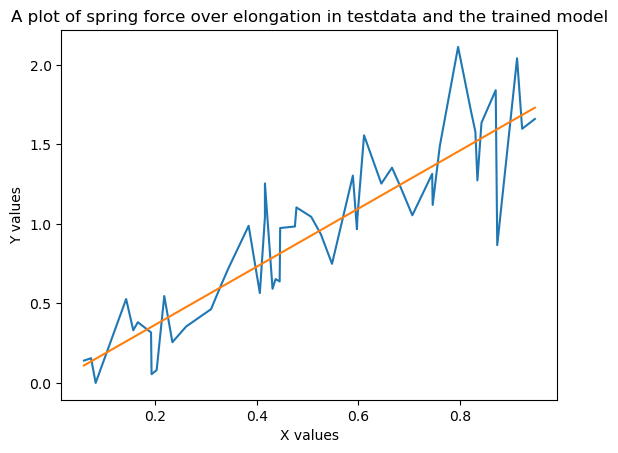

In [86]:
# YOUR CODE HERE
plt.plot(xtest, ytest)
plt.plot(xtest, xtest*theta)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('A plot of spring force over elongation in testdata and the trained model')

We are striving for a more quantitative approach: to do so, we are going to
define the **loss function**, which takes a vector of `x` points, a vector
of `y` points and the model parameter `theta`, and returns the loss:
$$
    \operatorname{loss}(x,y,\theta) = \frac{1}{N'} \sum_{n=1}^{N'} |y_n - f(x_n; \theta)|^2
$$

In [91]:
def loss(x, y, theta):
    # YOUR CODE HERE
    return sum((y - x*theta)**2)

In [92]:
assert loss(xtrain, ytrain, theta) > 0


Now we compute the loss for the training set and the validation set

(called the "in"-error and the "out"-error)

In [93]:
E_in = loss(xtrain, ytrain, theta)
print ("Training ('in') error:    %.4g" % E_in)

Training ('in') error:    2.71


In [94]:
E_out = loss(xtest, ytest, theta)
print ("Validation ('out') error: %.4g" % E_out)

Validation ('out') error: 2.775


Observe that these values are similar in magnitude.

 a) What does this mean for the "learning procedure"?

 b) What would we have to conclude if the validation loss had been much greater than the training loss?
 

a) it means that we did quite a good job
b) we would have to conclude that we didn't do a great job and should try again

Epilogue
---------

I lied to you.

You did not actually fit Hooke's law.  You instead fitted a normalized expected salary $y$ of
a job seeker based on a proprietary aptitude score $x$, calculated at the Department of Public Employment Service and Obsolescence Support (PESOS).

The top brass at PESOS are quite impressed with the model and want it to form the basis of a more
efficient distribution of funds to apt job seekers.  Reasons given:

 1. The model is fair, because it does not rely on human input.
 
 2. The model is based on cutting-edge technology, therefore it is trustworthy.
 
Discuss (briefly, I have a meeting later with them).

the salary should rather be based on actual work done than aptitude, because someone could have a much higher aptitude than someone else and that someone could still do no work at all and that someone else could have a work output higher than average.